In [1]:
# Importing needed libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
from PIL import Image



In [2]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/NTI project/garbage-dataset'
test_path = '/content/drive/MyDrive/NTI project/test_ds'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# checking the validity of data paths and the number of files in each class
# from genericpath import isdir
for classes in os.listdir(data_path):
  class_path = os.path.join(data_path, classes)
  # print(class_path)
  if os.path.isdir(class_path):
    files = os.listdir(class_path)
    print(f"{classes}: {len(files)} files")

battery: 851 files
shoes: 1777 files
cardboard: 1635 files
plastic: 1784 files
trash: 897 files
glass: 2761 files
clothes: 5195 files
paper: 1518 files
biological: 897 files
metal: 920 files


In [4]:
# checking for non-image files

valid_extensions = ('.jpg','.png','.jepg')

for classes in os.listdir(data_path):
  class_path = os.path.join(data_path, classes)
  if os.path.isdir(class_path):
    for current_file in os.listdir(class_path):
      if not current_file.lower().endswith(valid_extensions):
        print(f"{current_file} is not an image")

# no non-image files detected

In [5]:
#checking for corrupted files

from PIL import Image

corrupted_images = []

for classes in os.listdir(data_path):
  class_path = os.path.join(data_path, classes)
  if os.path.isdir(class_path):
    for corrent_file in os.listdir(class_path):
      file_path = os.path.join(class_path, corrent_file)
      try :
        with Image.open(file_path) as img :
          img.verify()  #verify if image can be oppened or not
      except (IOError, SyntaxError) as e:
        print(f"corrupted file : {file_path}")
        corrupted_images.append(file_path)

# No corrupted files are found using PIL

In [7]:
#checking for corrupted files using tensorflow
bad_files =[]

for classes in os.listdir(data_path):
  class_path = os.path.join(data_path, classes)
  if os.path.isdir(class_path):
    for corrent_file in os.listdir(class_path):
      file_path = os.path.join(class_path, corrent_file)
      try:
        img_raw = tf.io.read_file(file_path)
        img_tensor = tf.io.decode_image(img_raw, channels=3, expand_animations=False)
      except Exception as e:
        print(f"TensorFlow failed to load the file:{file_path}, error: {e}")
        bad_files.append(file_path)

bad_files
# Found two corrupted files

[]

In [6]:
#checking for corrupted files using tensorflow
bad_files_test =[]

for classes in os.listdir(test_path):
  class_path = os.path.join(test_path, classes)
  if os.path.isdir(class_path):
    for corrent_file in os.listdir(class_path):
      file_path = os.path.join(class_path, corrent_file)
      try:
        img_raw = tf.io.read_file(file_path)
        img_tensor = tf.io.decode_image(img_raw, channels=3, expand_animations=False)
      except Exception as e:
        print(f"TensorFlow failed to load the file:{file_path}, error: {e}")
        bad_files_test.append(file_path)

bad_files_test

#Found one corruoted files in the test data

[]

In [8]:
# deleting currupted images

for corrupted_images in bad_files:
  try:
    os.remove(corrupted_images)
    print(f"{corrupted_images} is removed")
  except Exception as e:
    print(f"failed to remove {corrupted_images}, error: {e}\n")

for corrupted_images in bad_files_test:
  try:
    os.remove(corrupted_images)
    print(f"{corrupted_images} is removed")
  except Exception as e:
    print(f"failed to remove {corrupted_images}, error: {e}\n")

In [3]:
#Loading clear data
data_dir = '/content/drive/MyDrive/NTI project/garbage-dataset'
test_dir = '/content/drive/MyDrive/NTI project/test_ds'

for classes in os.listdir(data_path):
  class_path = os.path.join(data_path, classes)
  # print(class_path)
  if os.path.isdir(class_path):
    files = os.listdir(class_path)
    print(f"{classes}: {len(files)} files") # the output shows that the paper data has lost 2 images (recheck the above cell to ensure that)

battery: 851 files
shoes: 1777 files
cardboard: 1635 files
plastic: 1784 files
trash: 897 files
glass: 2761 files
clothes: 5195 files
paper: 1518 files
biological: 897 files
metal: 920 files


In [4]:
# Splitting data
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir,
    subset = 'training',
    batch_size = 32,
    image_size = (180,180),
    shuffle = True,
    seed = 123,
    validation_split = 0.3,
    interpolation='nearest'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir,
    subset = 'validation',
    batch_size = 32,
    image_size = (180,180),
    shuffle = False,
    seed = 123,
    validation_split = 0.3,
    interpolation='nearest'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_dir,
    batch_size = 50,
    image_size = (180,180),
    shuffle = False,
    seed = 123,
    interpolation='nearest'
)

Found 18235 files belonging to 10 classes.
Using 12765 files for training.
Found 18235 files belonging to 10 classes.
Using 5470 files for validation.
Found 1524 files belonging to 10 classes.


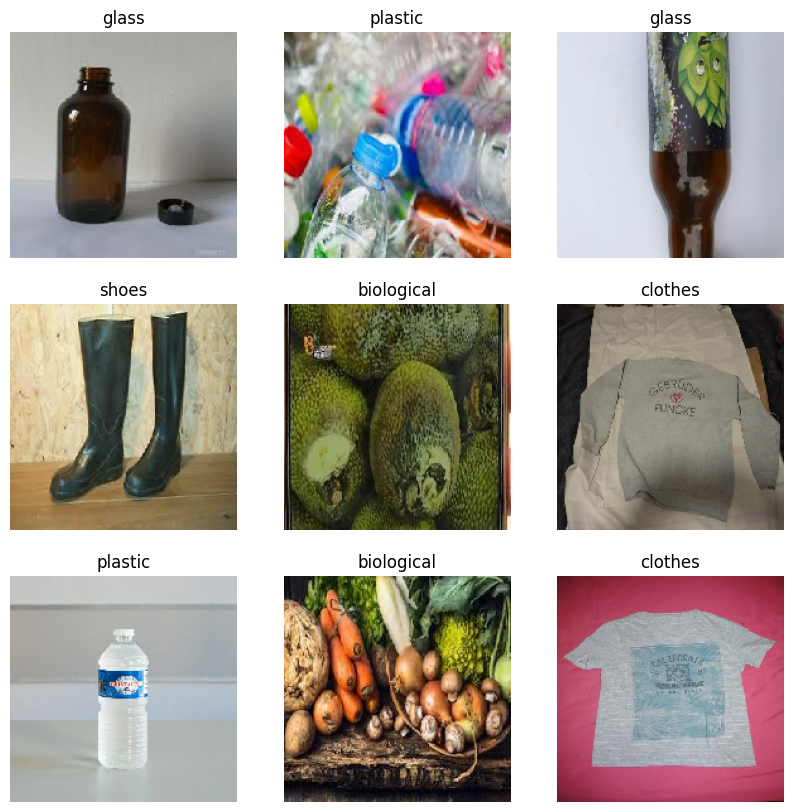

In [11]:
#visualising data
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [5]:
# preprocessing

#normalization
normalization = tf.keras.layers.Rescaling(1.0/255)

train_ds = train_ds.map(lambda x, y: (normalization(x),y))
val_ds = val_ds.map(lambda x,y:(normalization(x),y))
test_ds = test_ds.map(lambda x,y:(normalization(x),y))

#augmentaion

augmentation = tf.keras.Sequential([
    # layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomFlip('Horizental'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

train_ds = train_ds.map(lambda x,y: (augmentation(x, training=True),y))

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [6]:
# Model construction and training

model = tf.keras.Sequential ([
    # first convlution layer
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.AveragePooling2D(pool_size=2, strides=1),

    #second convolution layer
    # layers.Conv2D(64, kernel_size=3, activation='relu'),
    # layers.AveragePooling2D(pool_size=2, strides=1),

    #third convlutional layer
    # layers.Conv2D(64, kernel_size=3, activation='relu'),
    # layers.AveragePooling2D(pool_size=2, strides=1),

    #flattening the features
    layers.Flatten(),

    #fully connected layers
    # layers.Dense(1024, activation='relu'),
    # layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [7]:
# model compilation and training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 203s 431ms/step - accuracy: 0.3096 - loss: 13.0102 - val_accuracy: 0.2302 - val_loss: 2.1127
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 177s 443ms/step - accuracy: 0.4708 - loss: 1.5781 - val_accuracy: 0.3413 - val_loss: 1.8461
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 179s 447ms/step - accuracy: 0.5280 - loss: 1.3856 - val_accuracy: 0.4239 - val_loss: 1.5988
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 200s 441ms/step - accuracy: 0.5649 - loss: 1.2914 - val_accuracy: 0.3718 - val_loss: 1.7472
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 202s 444ms/step - accuracy: 0.5825 - loss: 1.2527 - val_accuracy: 0.4638 - val_loss: 1.5164


In [ ]:
# Saving model
model.save('model_1_5epochs.keras')